CNN,LSTM,XLSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("migraine_data.csv")

# Encode target variable
label_encoder = LabelEncoder()
df["Type"] = label_encoder.fit_transform(df["Type"])

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=["Type"]))
y = df["Type"]

# Reshape for CNN and LSTMs
X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

### 1️⃣ CNN Model Accuracy
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")

### 2️⃣ LSTM Model Accuracy
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(32),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)
lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {lstm_acc * 100:.2f}%")

### 3️⃣ XLSTM (Bidirectional LSTM) Accuracy
xlstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), input_shape=(X.shape[1], 1)),
    Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])
xlstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
xlstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)
xlstm_loss, xlstm_acc = xlstm_model.evaluate(X_test, y_test)
print(f"XLSTM Accuracy: {xlstm_acc * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.4574 - loss: 1.7891 - val_accuracy: 0.6125 - val_loss: 1.3509
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6654 - loss: 1.1925 - val_accuracy: 0.7875 - val_loss: 0.8091
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7645 - loss: 0.8385 - val_accuracy: 0.9125 - val_loss: 0.5094
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8725 - loss: 0.5872 - val_accuracy: 0.9250 - val_loss: 0.3493
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8767 - loss: 0.5491 - val_accuracy: 0.9125 - val_loss: 0.2955
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8860 - loss: 0.5150 - val_accuracy: 0.9125 - val_loss: 0.2615
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9002 - loss: 0.4075 - val_accuracy: 0.9125 - val_loss: 0.2474
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9163 - loss: 0.4159 - val_accuracy: 0.9250 - va

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6186 - loss: 1.8363 - val_accuracy: 0.6125 - val_loss: 1.2441
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6048 - loss: 1.3236 - val_accuracy: 0.6250 - val_loss: 1.1470
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6511 - loss: 1.1156 - val_accuracy: 0.7125 - val_loss: 1.0065
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6657 - loss: 1.0733 - val_accuracy: 0.7125 - val_loss: 0.9423
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6668 - loss: 1.0691 - val_accuracy: 0.7250 - val_loss: 0.8679
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6755 - loss: 0.9293 - val_accuracy: 0.8000 - val_loss: 0.7707
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7905 - loss: 0.7534 - val_accuracy: 0.8500 - val_loss: 0.5943
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7333 - loss: 0.7934 - val_accuracy: 0.8625 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.5036 - loss: 1.8819 - val_accuracy: 0.6875 - val_loss: 1.3645
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6694 - loss: 1.3205 - val_accuracy: 0.6875 - val_loss: 1.0625
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6611 - loss: 1.1333 - val_accuracy: 0.6875 - val_loss: 0.9531
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6722 - loss: 1.0289 - val_accuracy: 0.6875 - val_loss: 0.9125
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7026 - loss: 0.9527 - val_accuracy: 0.7000 - val_loss: 0.9085
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6722 - loss: 1.0080 - val_accuracy: 0.7375 - val_loss: 0.8148
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6963 - loss: 0.9261 - val_accuracy: 0.7250 - val_loss: 0.8135
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6898 - loss: 0.9129 - val_accuracy: 0.7500 - val_loss: 0.

Loss Vs Epoch

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9722 - loss: 0.1274 - val_accuracy: 0.9375 - val_loss: 0.2566
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9738 - loss: 0.1089 - val_accuracy: 0.9375 - val_loss: 0.2471
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9619 - loss: 0.1330 - val_accuracy: 0.9500 - val_loss: 0.2292
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9603 - loss: 0.1466 - val_accuracy: 0.9250 - val_loss: 0.2698
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9559 - loss: 0.1477 - val_accuracy: 0.9375 - val_loss: 0.2525
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9442 - loss: 0.1478 - val_accuracy: 0.9375 - val_loss: 0.2438
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9702 - loss: 0.1006 - val_accuracy: 0.9375 - val_loss: 0.2469
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9668 - loss: 0.0937 - val_accuracy: 0.9375 - val_los

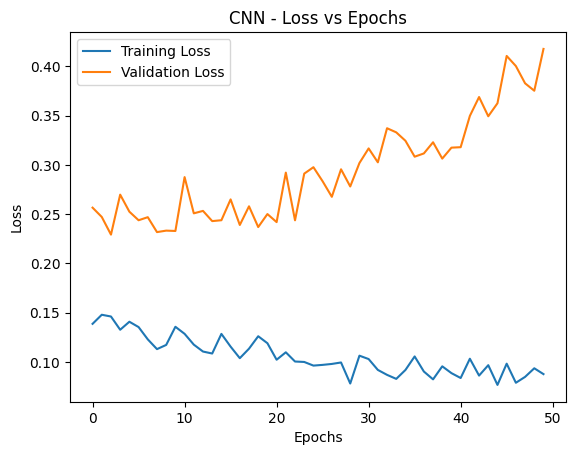

In [ ]:
import matplotlib.pyplot as plt

# Train CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=16,
                            validation_data=(X_test, y_test), verbose=1)

# Plot Loss vs Epochs for CNN
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN - Loss vs Epochs')
plt.legend()
plt.show()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9639 - loss: 0.1671 - val_accuracy: 0.9375 - val_loss: 0.2585
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9629 - loss: 0.1543 - val_accuracy: 0.8875 - val_loss: 0.3554
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9626 - loss: 0.1631 - val_accuracy: 0.8625 - val_loss: 0.4250
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9265 - loss: 0.2295 - val_accuracy: 0.9375 - val_loss: 0.2633
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9400 - loss: 0.2204 - val_accuracy: 0.9125 - val_loss: 0.2721
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9644 - loss: 0.1525 - val_accuracy: 0.9375 - val_loss: 0.2302
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9420 - loss: 0.1725 - val_accuracy: 0.8750 - val_loss: 0.4540
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9619 - loss: 0.1724 - val_accuracy: 0.7875 - v

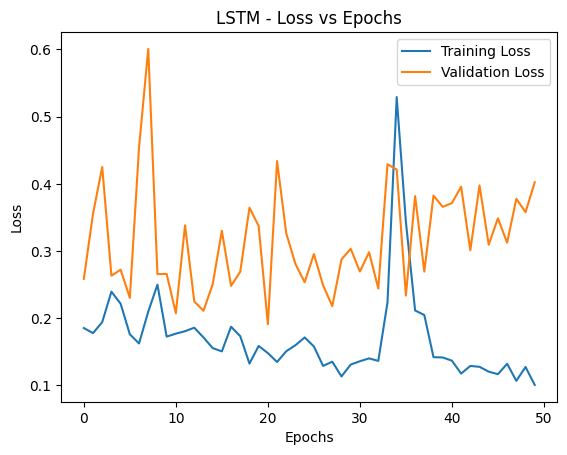

In [ ]:
# Train LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=16,
                              validation_data=(X_test, y_test), verbose=1)

# Plot Loss vs Epochs for LSTM
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM - Loss vs Epochs')
plt.legend()
plt.show()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8662 - loss: 0.3721 - val_accuracy: 0.9500 - val_loss: 0.1519
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9082 - loss: 0.2728 - val_accuracy: 0.9375 - val_loss: 0.1453
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8950 - loss: 0.3346 - val_accuracy: 0.9375 - val_loss: 0.1694
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9194 - loss: 0.2550 - val_accuracy: 0.9375 - val_loss: 0.1522
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8976 - loss: 0.3523 - val_accuracy: 0.9375 - val_loss: 0.1514
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8904 - loss: 0.3945 - val_accuracy: 0.9375 - val_loss: 0.1397
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9175 - loss: 0.3182 - val_accuracy: 0.9375 - val_loss: 0.1772
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9039 - loss: 0.3197 - val_accuracy: 0.9375 - v

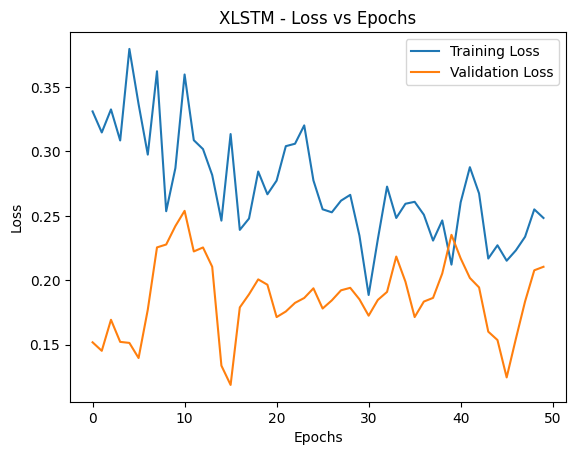

In [ ]:
# Train XLSTM model
xlstm_history = xlstm_model.fit(X_train, y_train, epochs=50, batch_size=16,
                                validation_data=(X_test, y_test), verbose=1)

# Plot Loss vs Epochs for XLSTM
plt.plot(xlstm_history.history['loss'], label='Training Loss')
plt.plot(xlstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('XLSTM - Loss vs Epochs')
plt.legend()
plt.show()


Graph for changing epochs and accuracy

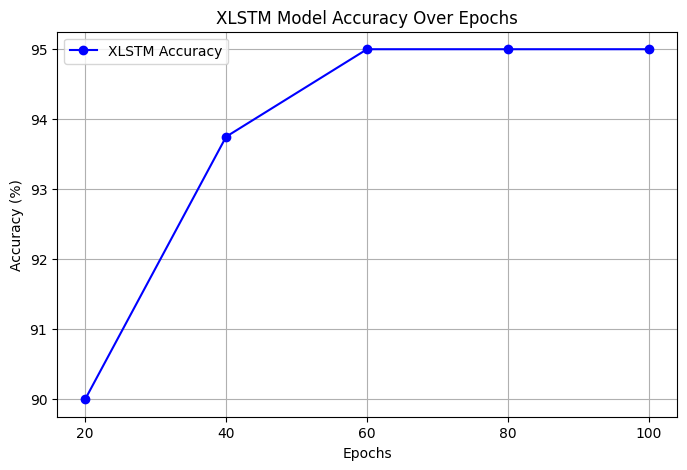

In [ ]:
import matplotlib.pyplot as plt

# Store accuracy values at specific epochs
epochs_to_plot = [20, 40, 60, 80, 100]
accuracy_values = []

# Train XLSTM model and store accuracy at specified epochs
xlstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), input_shape=(X.shape[1], 1)),
    Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

xlstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

for epoch in epochs_to_plot:
    history = xlstm_model.fit(X_train, y_train, epochs=epoch, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    loss, acc = xlstm_model.evaluate(X_test, y_test, verbose=0)
    accuracy_values.append(acc * 100)

# Plot the accuracy graph
plt.figure(figsize=(8, 5))
plt.plot(epochs_to_plot, accuracy_values, marker='o', linestyle='-', color='b', label='XLSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('XLSTM Model Accuracy Over Epochs')
plt.xticks(epochs_to_plot)
plt.grid(True)
plt.legend()
plt.show()


Change in dense sizes and accuracy

In [ ]:
import pandas as pd

# Define different dense layer sizes
dense_sizes = [16, 32, 64]
results = []

# Loop through different dense values
for dense_size in dense_sizes:
    print(f"Training models with Dense size: {dense_size}\n")

    # CNN Model
    cnn_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(dense_size, activation='relu'),
        Dropout(0.2),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test, verbose=0)

    # LSTM Model
    lstm_model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
        LSTM(32),
        Dense(dense_size, activation='relu'),
        Dropout(0.2),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test, verbose=0)

    # XLSTM Model
    xlstm_model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), input_shape=(X.shape[1], 1)),
        Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
        Dense(dense_size, activation='relu'),
        Dropout(0.2),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    xlstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    xlstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    xlstm_loss, xlstm_acc = xlstm_model.evaluate(X_test, y_test, verbose=0)

    # Store results
    results.append([dense_size, cnn_acc * 100, lstm_acc * 100, xlstm_acc * 100])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Dense Size", "CNN Accuracy (%)", "LSTM Accuracy (%)", "XLSTM Accuracy (%)"])

# Print results
print(df_results)


Training models with Dense size: 16

Training models with Dense size: 32

Training models with Dense size: 64

   Dense Size  CNN Accuracy (%)  LSTM Accuracy (%)  XLSTM Accuracy (%)
0          16         96.249998          96.249998           92.500001
1          32         94.999999          94.999999           93.750000
2          64         94.999999          88.749999           94.999999


In [ ]:
dense_sizes = [16, 32, 64]
results = {}

for size in dense_sizes:
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), input_shape=(X.shape[1], 1)),
        Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
        Dense(size, activation='relu'),
        Dropout(0.2),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model
    loss, acc = model.evaluate(X_test, y_test, verbose=1)

    # Store the results
    results[size] = acc * 100  # Convert accuracy to percentage

print("Results:", results)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.4729 - loss: 1.8589 - val_accuracy: 0.6875 - val_loss: 1.2746
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6248 - loss: 1.3239 - val_accuracy: 0.6875 - val_loss: 1.1433
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6472 - loss: 1.2054 - val_accuracy: 0.7000 - val_loss: 0.9544
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6414 - loss: 1.1465 - val_accuracy: 0.7125 - val_loss: 0.8616
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6450 - loss: 1.1118 - val_accuracy: 0.7125 - val_loss: 0.8479
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7090 - loss: 0.9789 - val_accuracy: 0.7125 - val_loss: 0.7275
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6687 - loss: 0.9495 - val_accuracy: 0.7250 - val_loss: 0.7366
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6565 - loss: 0.9926 - val_accuracy: 0.8125 - val_loss: 

Change in Batch sizes and accuracy graph

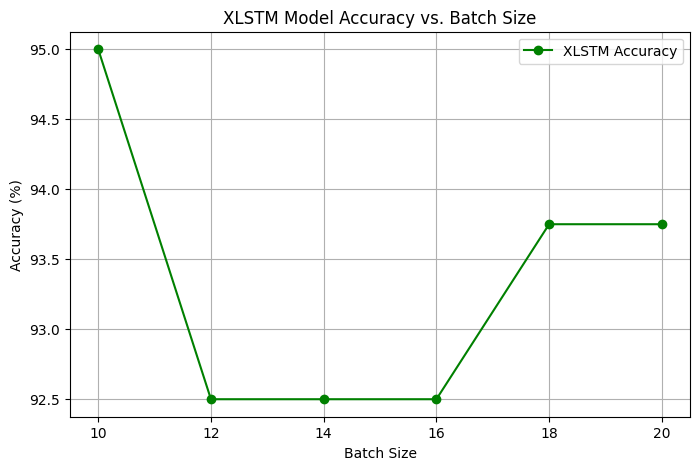

In [ ]:
import matplotlib.pyplot as plt

# Store accuracy values for different batch sizes
batch_sizes = [10, 12, 14, 16, 18, 20]
accuracy_values = []

# Train XLSTM model with different batch sizes and store accuracy
for batch_size in batch_sizes:
    xlstm_model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), input_shape=(X.shape[1], 1)),
        Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    xlstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train with a fixed number of epochs (e.g., 50)
    xlstm_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

    # Evaluate and store accuracy
    loss, acc = xlstm_model.evaluate(X_test, y_test, verbose=0)
    accuracy_values.append(acc * 100)

# Plot the accuracy graph
plt.figure(figsize=(8, 5))
plt.plot(batch_sizes, accuracy_values, marker='o', linestyle='-', color='g', label='XLSTM Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy (%)')
plt.title('XLSTM Model Accuracy vs. Batch Size')
plt.xticks(batch_sizes)
plt.grid(True)
plt.legend()
plt.show()


Confusion matrix for CNN,LSTM,XLSTM

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


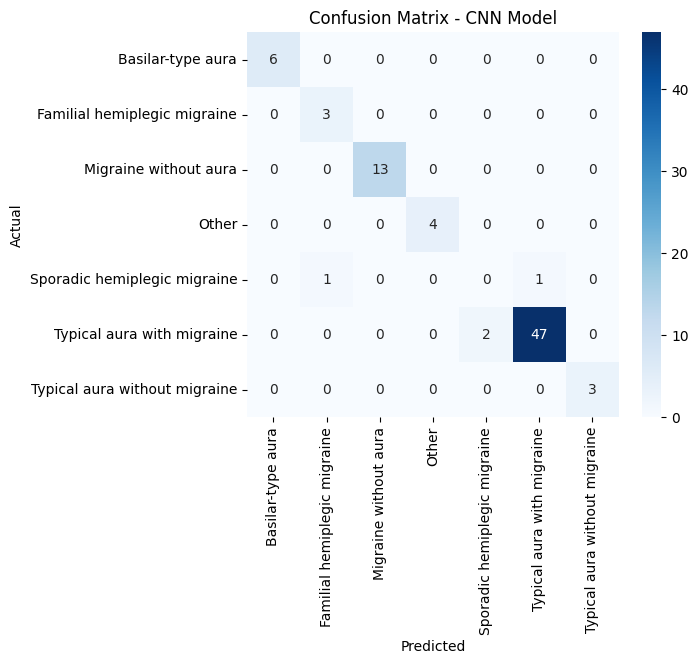

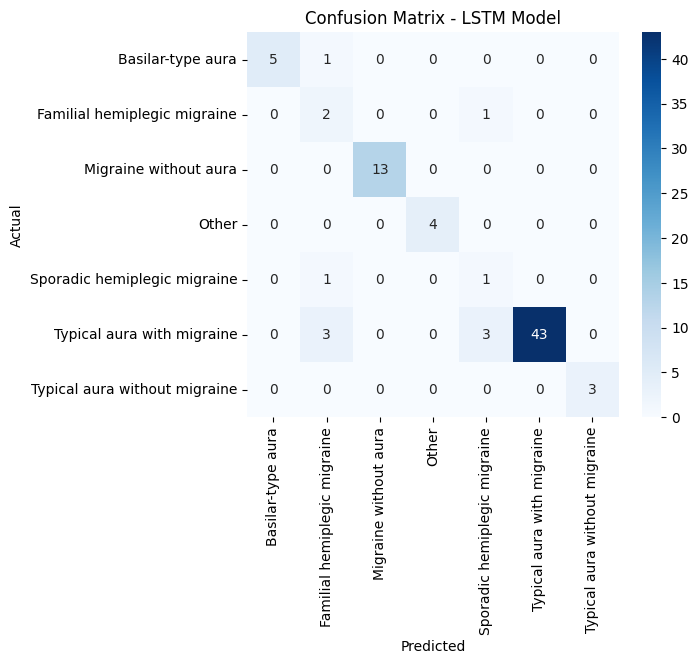

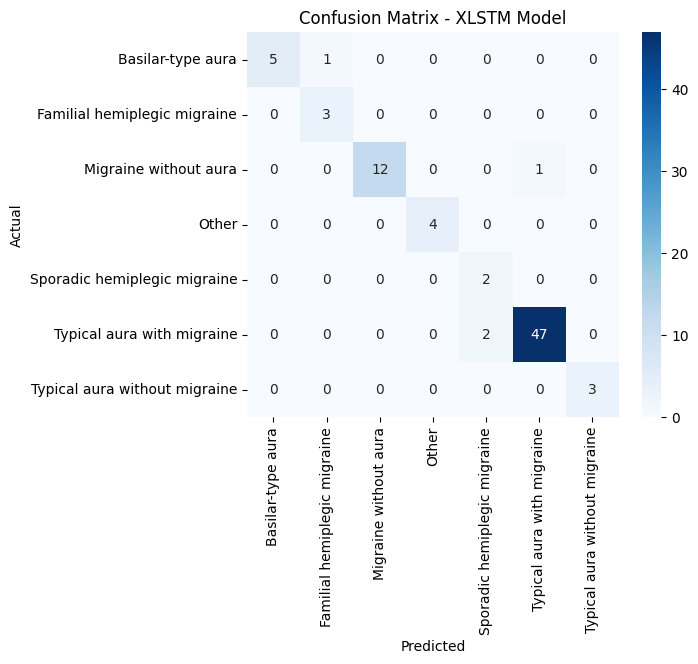

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for each model
cnn_pred = np.argmax(cnn_model.predict(X_test), axis=1)
lstm_pred = np.argmax(lstm_model.predict(X_test), axis=1)
xlstm_pred = np.argmax(xlstm_model.predict(X_test), axis=1)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, cnn_pred, "CNN Model")
plot_confusion_matrix(y_test, lstm_pred, "LSTM Model")
plot_confusion_matrix(y_test, xlstm_pred, "XLSTM Model")

